## This is before reducing features to final number

In [25]:
ssX = StandardScaler()
y = df['loan_status_Late'].values
df.drop('loan_status_Late', inplace=True, axis=1)
X = df.values
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.25)
X_train_scaled = ssX.fit_transform(X_train)
X_test_scaled = ssX.transform(X_test)
# params = {'strategy': ["stratified", "most_frequent", "prior", "uniform", "constant"]}
## This line instantiates the model. 
rf = RandomForestClassifier() 
## Fit the model on your training data.
rf.fit(X_train_scaled, y_train) 
## And score it on your testing data.
rf.score(X_test_scaled, y_test)

0.7543113917901384

In [33]:
Xtsd = pd.DataFrame(X_train_scaled)

In [38]:
y_pred = rf.predict(X_test_scaled)

In [45]:
(metrics.mean_absolute_error(y_pred, y_test))

31.876924945348556

In [46]:
y_pred

array([1, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [39]:
from sklearn import metrics

In [30]:
list(df)

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'last_fico_range_high',
 'last_fico_range_low',
 'annual_inc_joint',
 'dti_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'total_bal_il',
 'il_util',
 'max_bal_bc',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv

In [ ]:
var = [29, 19, 18, 31, 26, 6, 25, 3, 30, 4, 27, 47, 16, 43, 34, 85, 42, 5, 15]

In [34]:
feature_importances = pd.DataFrame(rf.feature_importances_, index = Xtsd.columns, columns=['importance']).sort_values('importance',ascending=False)

In [72]:
feature_importances[:70]

,importance
29,0.045224
19,0.042874
18,0.039887
31,0.030594
26,0.025383
6,0.023706
25,0.023110
3,0.022794
30,0.020579
4,0.019486


## LOG Reg

In [50]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train) 
## And score it on your testing data.
lr.score(X_test_scaled, y_test)

0.7327422880738401

## SVM

In [53]:
svc = svm.LinearSVC()
svc.fit(X_train_scaled, y_train) 
LinearSVC(C=1.0, class_weight='balanced', fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000, penalty='l2', random_state=None, tol=0.0001,
     verbose=0)


LinearSVC(C=1.0, class_weight='balanced', dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [55]:
svc.score(X_test_scaled, y_test)

0.7315521010444498

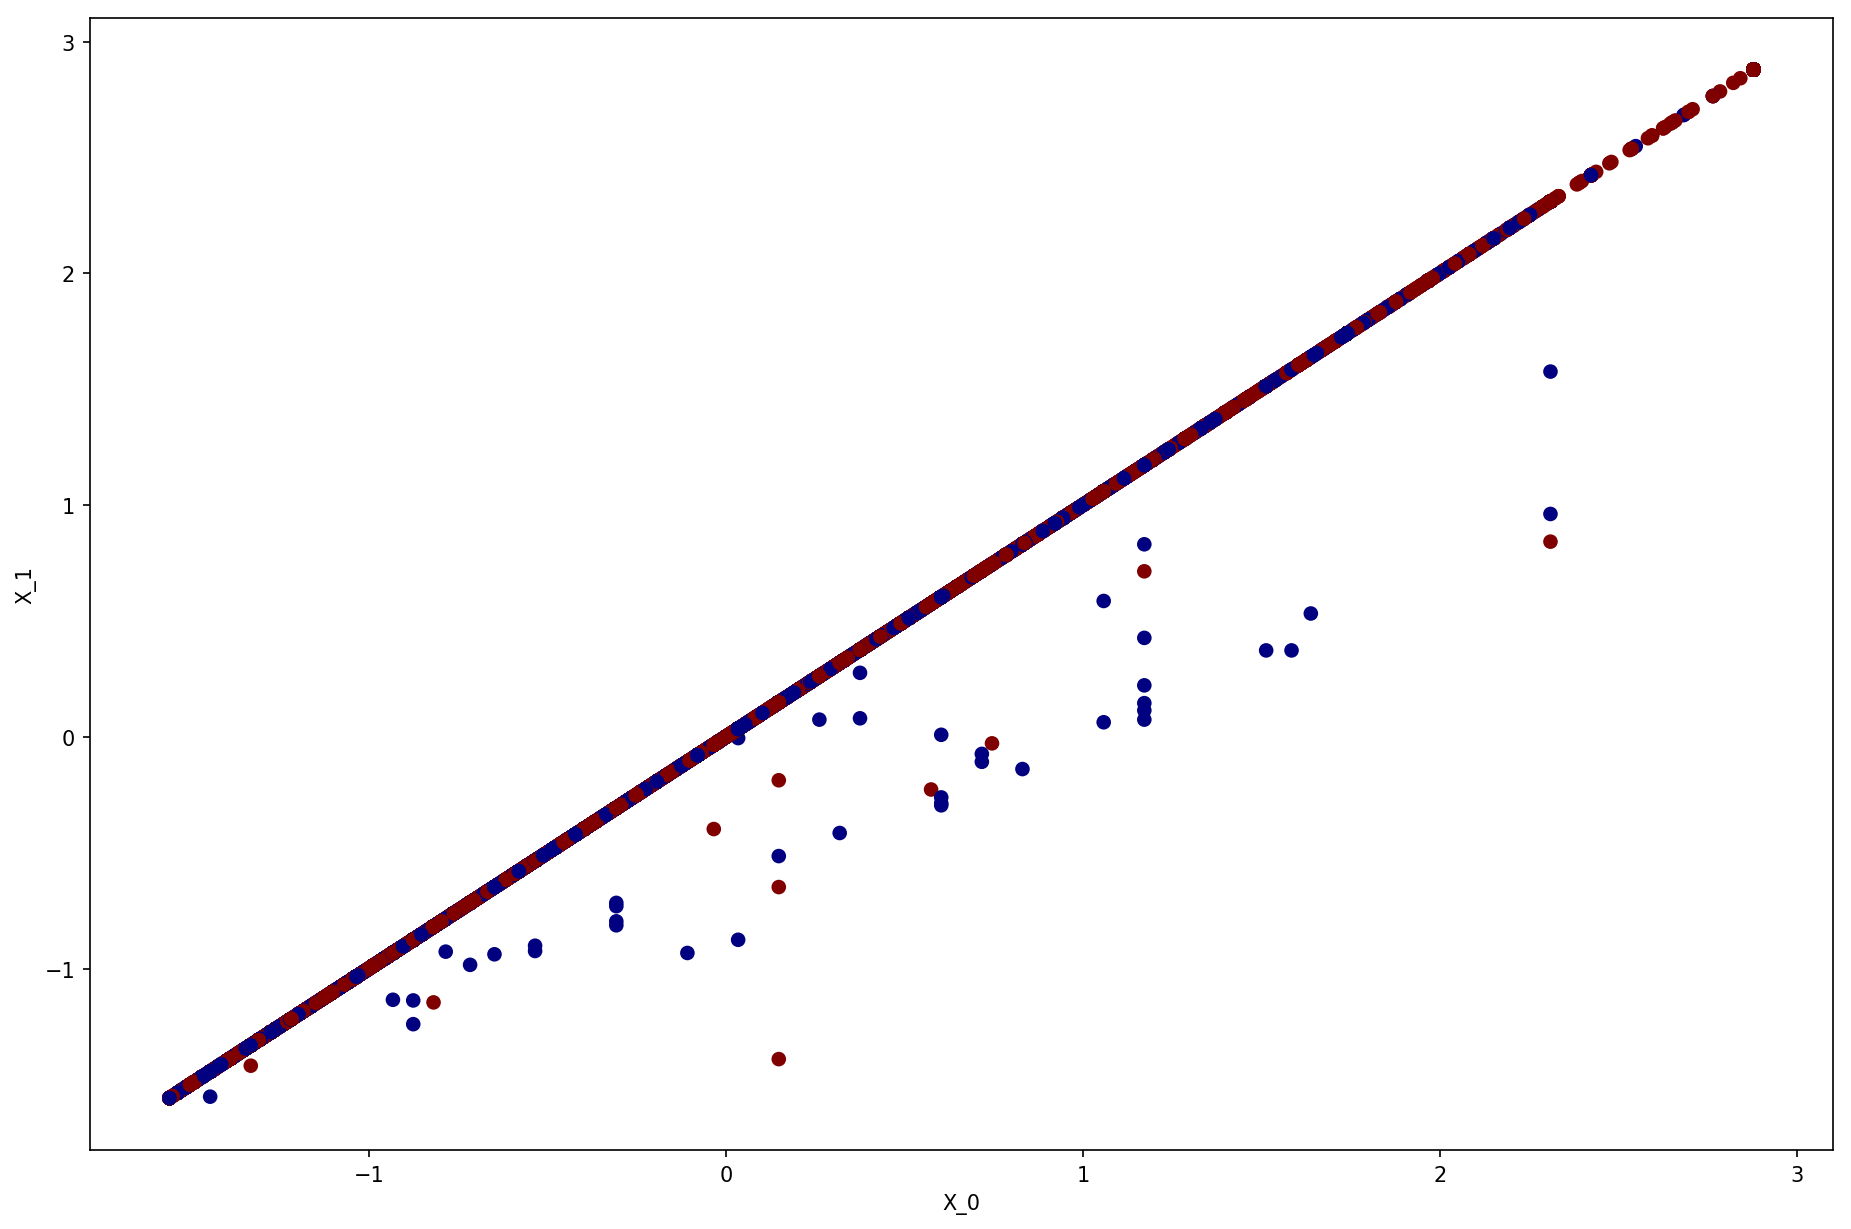

In [66]:
scatter_plot(X_test_scaled, y_test)

In [63]:
'''
def scatter_plot(X, y):
    num_classes = len(np.unique(y))
    plt.figure(dpi=150)
    plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.jet)
    plt.xlabel("X_0")
    plt.ylabel("X_1")
    return plt.gca()



def plot_contours(ax, clf, X, y, **params):
    """
    Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    X0, X1 = X[:, 0], X[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


ax = scatter_plot(X_train_scaled,y_train)
plot_contours(ax, svc, X_train_scaled, y_train, cmap=plt.cm.RdBu_r, alpha=0.5);
''';

In [76]:
df_dumb = pd.read_csv('df_dummys2.csv')

In [78]:
df_dumb.drop(columns = 'Unnamed: 0', inplace=True )

In [92]:
list(df_dumb)

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'last_fico_range_high',
 'last_fico_range_low',
 'annual_inc_joint',
 'dti_joint',
 'acc_now_delinq',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_act_il',
 'open_il_12m',
 'open_il_24m',
 'total_bal_il',
 'il_util',
 'max_bal_bc',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv

In [112]:
noDumb =['loan_status_Late', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'last_fico_range_high', 'last_fico_range_low', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'total_bal_il', 'il_util', 'max_bal_bc', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'pub_rec_bankruptcies' ,'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort' ,'total_bc_limit', 'total_il_high_credit_limit', 'revol_bal_joint', 'sec_app_fico_range_low', 'sec_app_fico_range_high', 'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 'sec_app_num_rev_accts', 'deferral_term', 'hardship_amount', 'hardship_length', 'hardship_dpd', 'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 'hardship_last_payment_amount', 'term_ 60 months']

In [143]:
ssX = StandardScaler()
y2 = df_du['loan_status_Late'].values
df_du.drop('loan_status_Late', inplace=True, axis=1)
X2 = df_du.values
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, random_state=0, test_size=0.25)
X2_train_scaled = ssX.fit_transform(X2_train)
X2_test_scaled = ssX.transform(X2_test)
# params = {'strategy': ["stratified", "most_frequent", "prior", "uniform", "constant"]}
## This line instantiates the model. 
rf = RandomForestClassifier() 
## Fit the model on your training data.
rf.fit(X2_train_scaled, y2_train) 
## And score it on your testing data.
rf.score(X2_test_scaled, y2_test)

0.7450813699295603

In [159]:
y_pred2

array([1, 1, 0, ..., 1, 1, 1])

(array([16201.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0., 24969.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

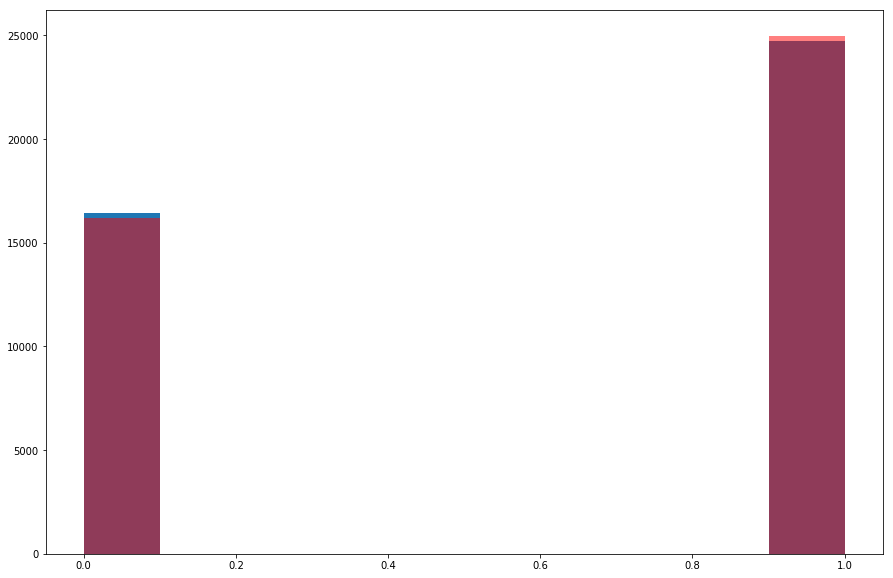

In [172]:
plt.hist(y_pred2)
plt.hist(y2_test, color ='red', alpha = .5)

In [154]:
y_pred2 = rf.predict(X2_test_scaled)

(41170,)

In [ ]:
from sklearn.tree import export_graphviz
forest_scores = np.array([est.score(X_train_s, y_train) for est in forest_model.estimators_])
forest_best = np.argmax(forest_scores)
export_graphviz(model.estimators_[forest_best],out_file='best_tree.dot', max_depth=4, feature_names=X_col[1:])

!dot -Tpng rsmpl_best_tree.dot -o best_tree.png